# **Fake News Detection**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## **Data Preparation**

### Import Dataset

In [2]:
df =pd.read_csv(r'C:\Documents\Datasets\news.csv')

### First rows

In [3]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


### Last rows

In [4]:
df.tail()

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


### Shape of df

In [5]:
df.shape

(6335, 4)

### Check for duplicate values

In [6]:
df.duplicated().sum()

0

### Check for null values()

In [7]:
df.isnull().any()

Unnamed: 0    False
title         False
text          False
label         False
dtype: bool

### Removing the unnamed column

In [8]:
df = df.drop('Unnamed: 0', axis = 1)
df.sample(20)

,title,text,label
4401,Clinton renews vow to 'fast track' immigration...,Hillary Clinton announced perhaps her most amb...,REAL
2290,Is It Safe To Use Expired Prescription Drugs?,"Backdoor Survival October 29, 2016 \nThe topic...",FAKE
3083,How Predictive Are Iowa And New Hampshire?,How Predictive Are Iowa And New Hampshire?\n\n...,REAL
3244,"Trump: I'll Only Lose With 'Cheating,' Asks Su...","Trump: I'll Only Lose With 'Cheating,' Asks Su...",REAL
1616,"Protesting Donald Trump’s Election, Not Wars, ...",Protests and vigils have erupted in major citi...,REAL
2750,Climate change crusade goes local,While US leaders remain bogged down in debate ...,REAL
2499,Opponents divided on how — or whether — to res...,"When Friday began, there were 14 states where ...",REAL
5829,AP fakes the news,"*Sent:* Tuesday, August 11, 2015 6:00 PM *To:*...",FAKE
2629,A Tear in the Fabric of America’s Political Th...,[Graphic: Clinton vs Trump by DonkeyHotey .] P...,FAKE
3578,Ted Cruz launches bid; Some pundits paint him ...,"Before he got to repealing ObamaCare, before h...",REAL


### Printing label column seperately

In [9]:
news_type_count = df.label
news_type_count.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

### Description

In [10]:
df.describe()

,title,text,label
count,6335,6335,6335
unique,6256,6060,2
top,OnPolitics | 's politics blog,"Killing Obama administration rules, dismantlin...",REAL
freq,5,58,3171


### Removing unnecessary columns

In [11]:
df = df.drop('title', axis = 1)
df.sample(20)

,text,label
727,(((Smithsonian))) Refuses to Include Judge in ...,FAKE
3911,0 comments Do you think that this Veteran’s ac...,FAKE
1657,\nAfter what appeared to be a refusal to conce...,FAKE
2446,"November 7, 2016 ‘We never denied Israel’s rig...",FAKE
1227,Bill Clinton is a sex-addicted ‘monster’ who...,FAKE
6077,"Posted on October 27, 2016 by Dr. Eowyn \nHill...",FAKE
920,The man authorities say killed four Marines in...,REAL
5609,"Keeping an eye on your own energy use is the ""...",REAL
173,"So, that happened: This week, the early stages...",REAL
5199,"As the Washington Post points out, Williams to...",REAL


## **Data Visualization**

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Plot pie chart

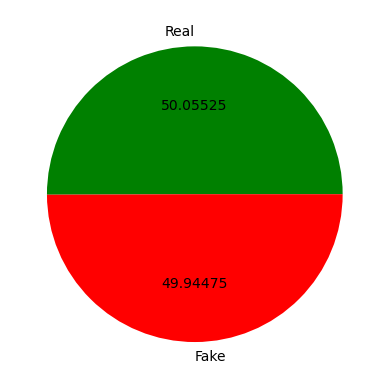

In [13]:
plt.pie(df['label'].value_counts(),labels=['Real','Fake'],colors=['green','red'],autopct='%0.5f')
plt.show()

#### *Data is well distributed*

### Function to change texts to simple ways

In [14]:
import re

def convert(text):
    text = text.lower()
    text = re.sub(r'https?://S+|www\.\S+' , '' , text)
    text = re.sub('\n' , '' , text)
    text = re.sub('\[.*?\]', '', text)
    words = []
    for i in text:
        if i not in string.punctuation:
            words.append(i)
    return ''.join(words)

In [15]:
import string

df["text"] = df["text"].apply(convert)
df

,text,label
0,daniel greenfield a shillman journalism fellow...,FAKE
1,google pinterest digg linkedin reddit stumbleu...,FAKE
2,us secretary of state john f kerry said monday...,REAL
3,— kaydee king kaydeeking november 9 2016 the l...,FAKE
4,its primary day in new york and frontrunners h...,REAL
...,...,...
6330,the state department told the republican natio...,REAL
6331,the ‘p’ in pbs should stand for ‘plutocratic’ ...,FAKE
6332,antitrump protesters are tools of the oligarc...,FAKE
6333,addis ababa ethiopia —president obama convened...,REAL


#### This function removes all special characters and unwanted words from df

## **Model Fitting**

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['label']=le.fit_transform(df['label'])
df.sample(10)

,text,label
611,behind the headlines conspiracies coverups an...,0
1935,get visible advertise here find out more react...,0
5091,tweet image via intodayin just as the indian e...,0
1576,philadelphia — charging that donald trump “wan...,1
997,shock video hillary needs help climbing one s...,0
1279,presidents often turn more moderate to make ga...,1
3294,the economic collapse – by michael snyder just...,0
1984,highfat ketogenic diet for weight loss by paul...,0
2803,prolifers have taken to social media to use pl...,1
2494,puerto rico defaults on a 422million debt paym...,1


#### Here, 1 is used to denote Fake news and 0 for Real news

In [17]:
x=df['text']
y=df['label']

### Train_Test_Split

#### We split the data into train and test sets to work on.

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['text'],df['label'], test_size=0.2, random_state=7)

In [19]:
x_train

6237    the head of a leading survivalist group has ma...
3722    ‹ › arnaldo rodgers is a trained and educated ...
5774    patty sanchez 51 used to eat 13000 calories a ...
336     but benjamin netanyahu’s reelection was regard...
3622    john kasich was killing it with these iowa vot...
                              ...                        
5699                                                     
2550    it’s not that americans won’t elect wealthy pr...
537     anyone writing sentences like ‘nevertheless fu...
1220    more catholics are in congress than ever befor...
4271    it was hosted by cnn and the presentation was ...
Name: text, Length: 5068, dtype: object

### Vectorization

#### Vectorization is a step in feature extraction. The idea is to convert text to numerical vectors to get distinct features out of the text for the model to train on. This is done to speed up the processing time.

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train= vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

In [22]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

## **Logistic Regression**

In [23]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
pred_LR = LR.predict(x_test)
print(accuracy_score(y_test,pred_LR))
print(classification_report(y_test,pred_LR))

0.9187056037884768
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       638
           1       0.93      0.90      0.92       629

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



## **Decision Tree Classifier**

In [24]:
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
pred_DT = DT.predict(x_test)
print(accuracy_score(y_test,pred_DT))
print(classification_report(y_test,pred_DT))

0.8121546961325967
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       638
           1       0.81      0.81      0.81       629

    accuracy                           0.81      1267
   macro avg       0.81      0.81      0.81      1267
weighted avg       0.81      0.81      0.81      1267



## **Gradient Boosting Classifier**

In [25]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
pred_GB = GB.predict(x_test)
print(accuracy_score(y_test,pred_GB))
print(classification_report(y_test,pred_GB))

0.8958168902920284
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       638
           1       0.89      0.90      0.90       629

    accuracy                           0.90      1267
   macro avg       0.90      0.90      0.90      1267
weighted avg       0.90      0.90      0.90      1267



## **Random Forest Classifier**

In [26]:
RF = RandomForestClassifier()
RF.fit(x_train,y_train)
pred_RF = RF.predict(x_test)
print(accuracy_score(y_test,pred_RF))
print(classification_report(y_test,pred_RF))

0.8887134964483031
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       638
           1       0.91      0.87      0.89       629

    accuracy                           0.89      1267
   macro avg       0.89      0.89      0.89      1267
weighted avg       0.89      0.89      0.89      1267



### Testing

In [30]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "True News"
def test(news):
    testing_news = {"text":[news]}
    new_def_test= pd.DataFrame (testing_news)
    new_def_test["text"] = new_def_test["text"].apply(convert)
    new_x_test= new_def_test["text"]
    new_x_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_x_test)
    pred_DT = DT.predict(new_x_test)
    pred_GB = GB.predict(new_x_test)
    pred_RF = RF.predict(new_x_test)
    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR),
                                                                                                              output_lable(pred_DT),
                                                                                                              output_lable(pred_GB),
                                                                                                              output_lable(pred_RF)))

## **Predictions**

In [32]:
news = str(input('Enter your news:'))
test(news)

Enter your news: "While some Justice Department investigations are adversarial, a new model of collaborative reform is surprising police in some cities, asÂ they find themselves included as part of the solution. Searching for a framework ... [to] heal, Baltimore Mayor Stephanie Rawlings-Blake put in a 911 call to the US Department of Justice to ask for a civil rights investigation into the Baltimore Police Departmentâ€™s beat cop tactics. Her call, not even a week after a local prosecutor charged six police officers with crimes including murder for their alleged role in the death of Freddie Gray, is part of a broader trend of collaborative reform between Washington and local jurisdictions. What's striking about such investigations is that they don't just slam the police, but also aim to help officers stay safe and protect citizens, as well as show that they are part of the solution. In fact, following a Baltimore Sun series on police abuses in the city last year, Police Commissioner An



LR Prediction: True News 
DT Prediction: True News 
GBC Prediction: True News 
RFC Prediction: True News


In [33]:
news = str(input('Enter your news:'))
test(news)

Enter your news: "Just weeks ago, it did not seem that Marco Rubio needed to lose any sleep over Jeb Bush. After all, Rubio was seen as the darling presidential candidate of the GOP establishment because of a string of impressive debate performances and a strong Iowa caucus showing. But after a disastrous GOP debate where Chris Christie essentially left the normally cool and eloquent Rubio stammering, followed by a fifth-place finish in the New Hampshire primary, the South Carolina vote on Saturday has become critical for the Florida lawmaker. He must persuade people who had been ready to ditch Bush for Rubio after New Hampshire, but who got jittery after he did worse than expected, that he has recovered and is the best non-extreme Republican option for the nomination, according to the New York Times. A Rubio supporter said the senator entered the ill-fated debate with indications from Bush backers that they would be ready to switch loyalty after the New Hampshire primary, which had be



LR Prediction: True News 
DT Prediction: True News 
GBC Prediction: True News 
RFC Prediction: True News


In [31]:
news = str(input('Enter your news:'))
test(news)

Enter your news: "With Trump's call for a temporary ban on Muslims entering the United States, several of the nation's most esteemed journalists and influential news outlets have set aside traditional notions of balance and given themselves license to label the Republican front-runner a liar, a demagogue, a racist and worse."




LR Prediction: Fake News 
DT Prediction: True News 
GBC Prediction: Fake News 
RFC Prediction: Fake News
